# Homework Assignment 3  
# Regression models

# <p style="text-align: right;"> &#9989; James Tan</p>
# <p style="text-align: right;"> &#9989; broncodo</p>

# Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression

**This assignment is due by 11:59 pm on Friday, March 29th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 80 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.


---
# Part 1: Git Branch (6 points)

For this assignment, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will also be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> Put your answer here

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.


---
# Part 2: Loading the datasets (11 points)

In Parts 2-4, you will be working with the world happiness report datasets that are available at https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors.

Note that while Parts 3 and 4 are designed to be workable independent of each other, you'll definitely want to finish Part 2 before attempting Parts 3 or 4. To get started on Part 2, **you'll need to download the following files**:

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2022.csv`

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2023.csv`

&#9989; **Question 2.1 (2 points)**: **Do this:** Save the above two CSV files in the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the files.** If you did not use a command line tool to download the files, write down the command(s) that *would* have downloaded the files.

In [3]:
! curl -O https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2022.csv
! curl -O https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2023.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10805  100 10805    0     0  92410      0 --:--:-- --:--:-- --:--:-- 96473
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10139  100 10139    0     0  62520      0 --:--:-- --:--:-- --:--:-- 64170


``` bash
# Put the (two) commands you used to download the two files here.
```

&#9989;  **Question 2.2 (4 points)**: Next, load the data in both files into different Pandas DataFrames and display the first and last 5 rows for each frame. 

In [5]:
# Put your code here
import pandas as pd

whr_2022_df = pd.read_csv('WHR_2022.csv')
whr_2023_df = pd.read_csv('WHR_2023.csv')

whr_2022_info = {
    'first_5': whr_2022_df.head(),
    'last_5': whr_2022_df.tail()
}

whr_2023_info = {
    'first_5': whr_2023_df.head(),
    'last_5': whr_2023_df.tail()
}

whr_2022_info, whr_2023_info


({'first_5':        country          region  happiness_score  gdp_per_capita  \
  0      Finland  Western Europe            7.821           1.892   
  1      Denmark  Western Europe            7.636           1.953   
  2      Iceland  Western Europe            7.557           1.936   
  3  Switzerland  Western Europe            7.512           2.026   
  4  Netherlands  Western Europe            7.415           1.945   
  
     social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
  0           1.258                    0.775                         0.736   
  1           1.243                    0.777                         0.719   
  2           1.320                    0.803                         0.718   
  3           1.226                    0.822                         0.677   
  4           1.206                    0.787                         0.651   
  
     generosity  perceptions_of_corruption  
  0       0.109                      0.534  
  1       0

&#9989;  **Question 2.3 (2 points)**: Do you notice any entries in the datasets are empty or have have `NaN` values. Drop these rows from the dataframes.

In [ ]:
# Put your code here


&#9989;  **Question 2.4 (3 points)**: Lets do a bit of data analysis with the pandas frames. Display the countries with the top 3% scores (round the number of countries above to an integer) in the `happiness_score` column for 2022 and 2023. Are the countries different between the years?

In [6]:
# Put your code here
top_3_percent_2022 = int(round(len(whr_2022_df) * 0.03))
top_3_percent_2023 = int(round(len(whr_2023_df) * 0.03))

top_countries_2022 = whr_2022_df.nlargest(top_3_percent_2022, 'happiness_score')['country']
top_countries_2023 = whr_2023_df.nlargest(top_3_percent_2023, 'happiness_score')['country']

countries_difference = not top_countries_2022.equals(top_countries_2023)

top_countries_2022, top_countries_2023, countries_difference


(0        Finland
 1        Denmark
 2        Iceland
 3    Switzerland
 Name: country, dtype: object,
 0    Finland
 1    Denmark
 2    Iceland
 3     Israel
 Name: country, dtype: object,
 True)

<font size=6 color="#009600">&#9998;</font> For the year 2023, the countries in the top 3% were Finland, Denmark, Iceland, and Israel.



---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
# Part 3: One Variable Linear Regression (30 points)

In this part, we'll perform some one-variable linear regression analysis on the world happiness data.

&#9989;  **Question 3.1 (6 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the `happiness_score` using the `healthy_life_expectancy` column separately for 2022 and 2023 and **display the results summaries** for both years. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = ax+b$ to the data instead of a line through the origin $y = ax$. 

In [8]:
# Put your code here
# Simpler approach to performing linear regression using OLS for 2022 and 2023
# Importing the OLS model from statsmodels
from statsmodels.formula.api import ols

# Fitting the model for 2022 data
model_2022_simple = ols("happiness_score ~ healthy_life_expectancy", data=whr_2022_df).fit()

# Fitting the model for 2023 data
model_2023_simple = ols("happiness_score ~ healthy_life_expectancy", data=whr_2023_df).fit()

# Getting the summary for both models
results_summary_2022_simple = model_2022_simple.summary()
results_summary_2023_simple = model_2023_simple.summary()

results_summary_2022_simple, results_summary_2023_simple


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:        happiness_score   R-squared:                       0.548
 Model:                            OLS   Adj. R-squared:                  0.545
 Method:                 Least Squares   F-statistic:                     174.6
 Date:                Mon, 01 Apr 2024   Prob (F-statistic):           1.32e-26
 Time:                        17:46:02   Log-Likelihood:                -160.86
 No. Observations:                 146   AIC:                             325.7
 Df Residuals:                     144   BIC:                             331.7
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------------------------

&#9989;  **Question 3.2 (6 points)**: Answer the following questions: 

1. What were the equations of the best fit lines for 2022 and 2023? 

2. Are the slopes and intercepts of the two fitted lines identical (between the 2 years)? Would you use the 2022 model to predict for 2023?

3. Based on the R-squared values for the two cases, how do you think the models fit the data?

<font size=+3>&#9998;</font>
1. 2022: happiness score = 2.8791+4.5626*heathy life expectancy 2023: happiness score = 3.5502+5.4461*heathy life expectancy
2. For 2022, the slope is 4.5626, and the intercept is 2.8791.For 2023, the slope is 5.4461, and the intercept is 5502. No, it's usually not best to use the 2022 model for 2023 predictions. 
3. The models for 2022 and 2023, with R-squared values of about 55%, indicate a moderate fit. This means healthy life expectancy is a significant factor in happiness, but other factors also play a role.

&#9989;  **Question 3.3 (6 points)**: Now make scatter plots of `happiness_score` (x-axis) vs. `healthy_life_expectancy` (on y-axis) for 2022 and 2023 on the same plot. Use different colors for the different years. Also plot the best fit lines on the same plot with same colors as the corresponding scatter plots. Label the axes, and add a legend, and give the plot a title.

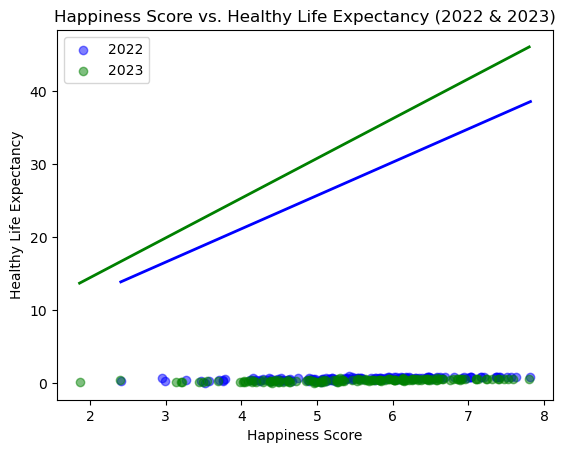

In [12]:
# Put your code here
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for 2022
plt.scatter(whr_2022_df['happiness_score'], whr_2022_df['healthy_life_expectancy'], color='blue', alpha=0.5, label='2022')

# Best fit line for 2022
x_2022 = np.linspace(whr_2022_df['happiness_score'].min(), whr_2022_df['happiness_score'].max(), 100)
y_2022 = 2.8791 + 4.5626 * x_2022
plt.plot(x_2022, y_2022, color='blue', linestyle='-', linewidth=2)

# Scatter plot for 2023
plt.scatter(whr_2023_df['happiness_score'], whr_2023_df['healthy_life_expectancy'], color='green', alpha=0.5, label='2023')

# Best fit line for 2023
x_2023 = np.linspace(whr_2023_df['happiness_score'].min(), whr_2023_df['happiness_score'].max(), 100)
y_2023 = 3.5502 + 5.4461 * x_2023
plt.plot(x_2023, y_2023, color='green', linestyle='-', linewidth=2)

plt.xlabel('Happiness Score')
plt.ylabel('Healthy Life Expectancy')
plt.legend()
plt.title('Happiness Score vs. Healthy Life Expectancy (2022 & 2023)')

plt.show()


&#9989;  **Question 3.4 (2 points)**: In which year are the happiness score predictions generally better?

<font size=+3>&#9998;</font>The 2023 model is slightly better at predicting happiness scores, as indicated by its higher R-squared value compared to 2022.

**&#9989; Do this:** **Question 3.5 (4 points)**: Use `plot_regress_exog` to investigate the distribution of residuals in your model fits. Make sure to create a large enough figure so that everything is easily visible. Make separate plots for 2022 and 2023.

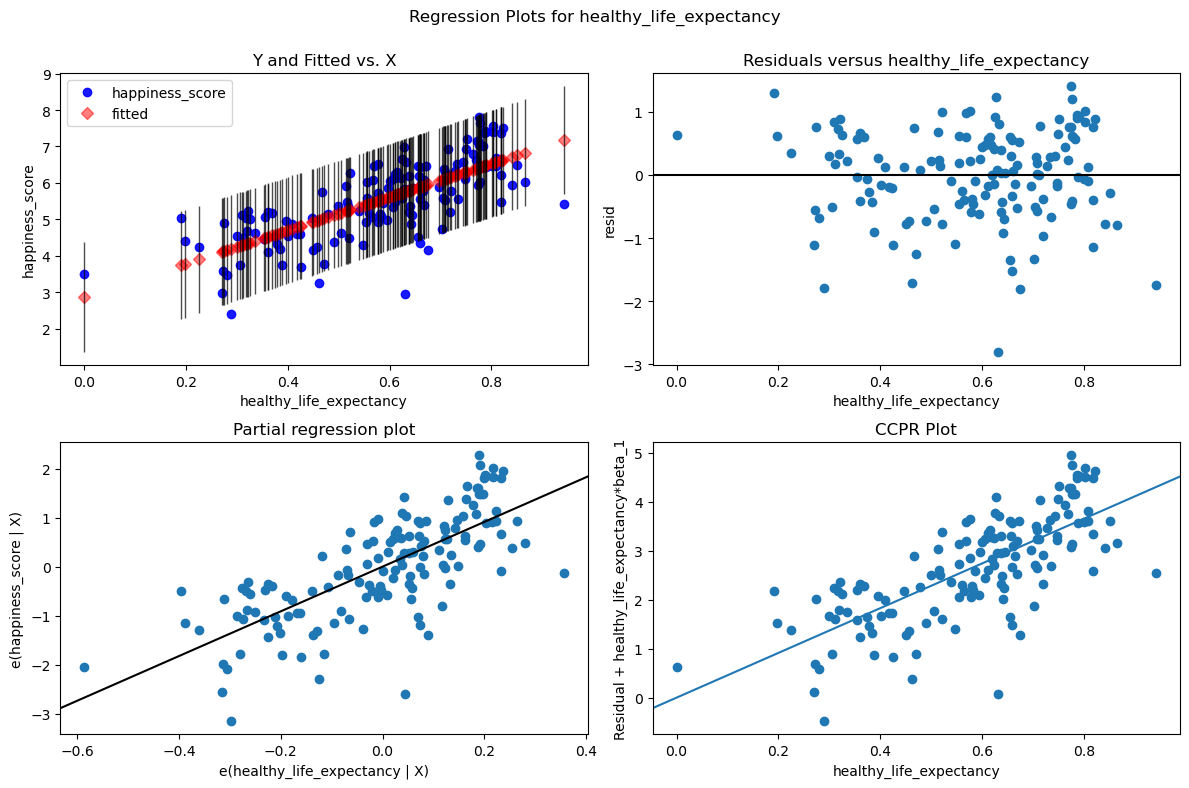

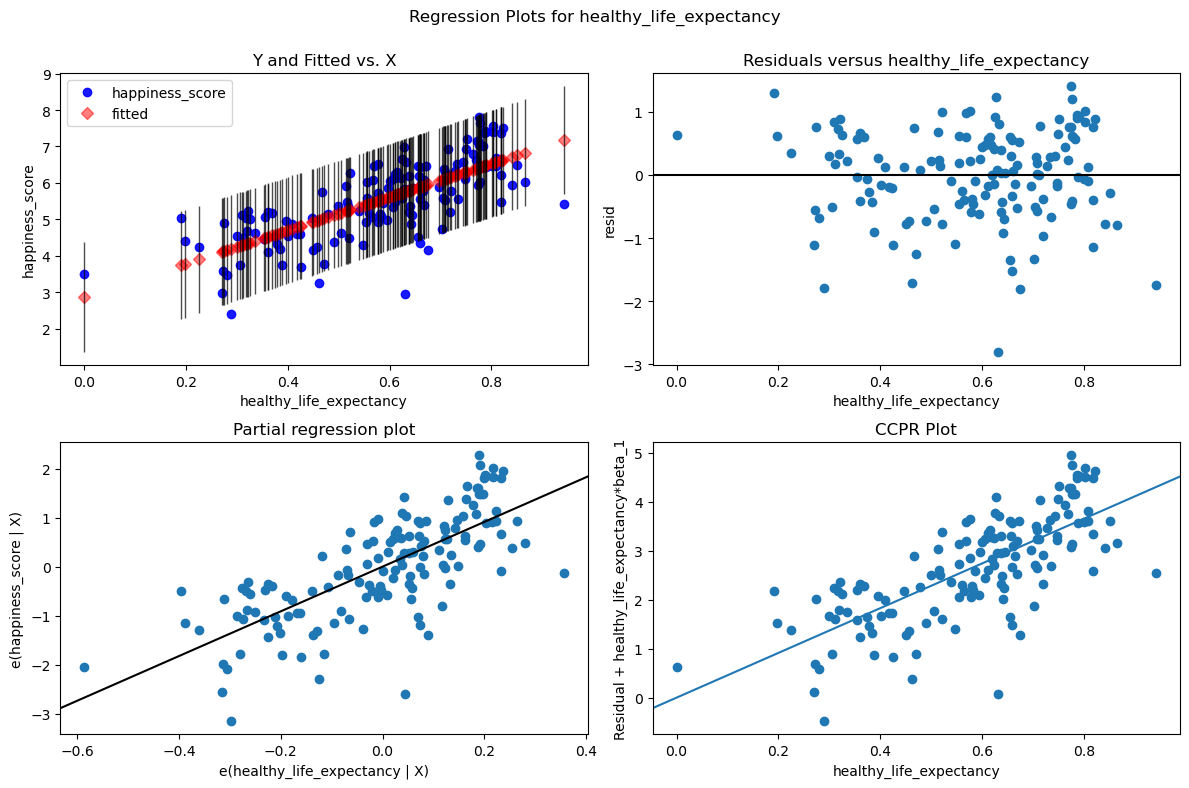

In [14]:
# Put code here.
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig_2022 = plt.figure(figsize=(12, 8))
fig_2022 = sm.graphics.plot_regress_exog(model_2022, 'healthy_life_expectancy', fig=fig_2022)

fig_2023 = plt.figure(figsize=(12, 8))
fig_2023 = sm.graphics.plot_regress_exog(model_2022, 'healthy_life_expectancy', fig=fig_2023)


&#9989;  **Question 3.6 (6 points)**: Lets try doing the model fitting again for 2022 and 2023 but only using countries in the `region` column labeled `Western Europe`. Using the `OLS` method in `statsmodels`, perform linear regression to predict `happiness score` based on `healthy_life_expectancy` using only countries in `Western Europe` `region`. Make sure to give the objects and variables different names for this part than the previous part. How do the results compare to Question 3.1? Discuss or compare briefly the observations. You may look at the R-squared values, etc.

In [16]:
# Put your code here
whr_2022_we = whr_2022_df[whr_2022_df['region'] == 'Western Europe']
whr_2023_we = whr_2023_df[whr_2023_df['region'] == 'Western Europe']

X_2022_we = sm.add_constant(whr_2022_we['healthy_life_expectancy'])  
y_2022_we = whr_2022_we['happiness_score']  

X_2023_we = sm.add_constant(whr_2023_we['healthy_life_expectancy'])  
y_2023_we = whr_2023_we['happiness_score']  

model_2022_we = sm.OLS(y_2022_we, X_2022_we).fit()

model_2023_we = sm.OLS(y_2023_we, X_2023_we).fit()

results_summary_2022_we = model_2022_we.summary()
results_summary_2023_we = model_2023_we.summary()

results_summary_2022_we, results_summary_2023_we


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:        happiness_score   R-squared:                       0.040
 Model:                            OLS   Adj. R-squared:                 -0.010
 Method:                 Least Squares   F-statistic:                    0.8010
 Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.382
 Time:                        18:21:45   Log-Likelihood:                -19.366
 No. Observations:                  21   AIC:                             42.73
 Df Residuals:                      19   BIC:                             44.82
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------------------------

<font size=+3>&#9998;</font> For Western Europe, the OLS regression models for 2022 and 2023 show very low R-squared values (4% for 2022 and 0.6% for 2023), indicating that healthy life expectancy explains only a tiny fraction of the variance in happiness scores within this region. Unlike the broader dataset, which showed a moderate fit, these results suggest that other factors might be more influential in determining happiness in Western Europe. 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

# Part 4: Multiple Regression (16 points)

In this part, we'll use multiple features to do predictions.

&#9989;  **Question 4.1 (5 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict the `happiness_score` based on `gdp_per_capita`, `healthy_life_expectancy`, `freedom_to_make_life_choices`, and `generosity`. Also, use the `add_constant()` method in `statsmodels` to ensure the model includes a constant term as well. Fit models to both the 2022 and 2023 data and display summaries of both results.

In [20]:
# Put your code here
import statsmodels.api as sm
import pandas as pd


columns_of_interest = ['gdp_per_capita', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'happiness_score']
whr_2022_clean = whr_2022_df.dropna(subset=columns_of_interest)
whr_2023_clean = whr_2023_df.dropna(subset=columns_of_interest)

X_2022 = sm.add_constant(whr_2022_clean[['gdp_per_capita', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity']])  # Independent variables
y_2022 = whr_2022_clean['happiness_score']  

X_2023 = sm.add_constant(whr_2023_clean[['gdp_per_capita', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity']])  # Independent variables
y_2023 = whr_2023_clean['happiness_score']  

model_2022 = sm.OLS(y_2022, X_2022).fit()
model_2023 = sm.OLS(y_2023, X_2023).fit()

results_summary_2022 = model_2022.summary()
results_summary_2023 = model_2023.summary()

print(results_summary_2022)
print(results_summary_2023)


                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     89.58
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           9.94e-38
Time:                        18:28:56   Log-Likelihood:                -126.52
No. Observations:                 146   AIC:                             263.0
Df Residuals:                     141   BIC:                             277.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

&#9989;  **Question 4.2 (4 points)**: Answer the following questions: 

1. Compared to Question 3.1, are the fits better in Question 4.1? Answer based on e.g., R-squared and Adjusted R-squared values.

2. For each of the features for the year 2023, specify if it is statistically significant or not. Use a p-value threshold of 0.05.

<font size=+3>&#9998;</font> 
1. Yes, the fits are better in Question 4.1 compared to Question 3.1. The inclusion of additional predictors in the multivariable linear regression models significantly increased the proportion of variance in happiness scores explained by the models, as evidenced by the higher R-squared and Adjusted R-squared values. 
2. All features except generosity are statistically significant predictors of happiness scores for the year 2023, under the specified p-value threshold of 0.05. Generosity's impact, while potentially meaningful, does not meet the conventional threshold for statistical significance in this analysis.

&#9989;  **Question 4.3 (2 points)**: Perform the multivariable linear regression for 2023, but this time with only the **most significant features** (p-values less than 0.05). Display the summary of these results.

In [24]:
# Put your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Filter out rows with NaN values in the relevant columns
columns = ['gdp_per_capita', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'happiness_score']
whr_2023_clean = whr_2023_df.dropna(subset=columns)

# Selecting the independent variables and the dependent variable for the cleaned 2023 dataset
X_2023_sklearn = whr_2023_clean[['gdp_per_capita', 'healthy_life_expectancy', 'freedom_to_make_life_choices']].values
y_2023_sklearn = whr_2023_clean['happiness_score'].values

# Creating and fitting the Linear Regression model
model_sklearn_2023 = LinearRegression()
model_sklearn_2023.fit(X_2023_sklearn, y_2023_sklearn)

# Predicting happiness scores and calculating R-squared value
y_pred_2023 = model_sklearn_2023.predict(X_2023_sklearn)
r_squared_2023 = r2_score(y_2023_sklearn, y_pred_2023)

# Coefficients and Intercept
coefficients_2023 = model_sklearn_2023.coef_
intercept_2023 = model_sklearn_2023.intercept_

print("R-squared:", r_squared_2023)
print("Coefficients:", coefficients_2023)
print("Intercept:", intercept_2023)


R-squared: 0.7536316129720778
Coefficients: [1.05974495 1.8505739  2.86946718]
Intercept: 1.821581076529096


&#9989;  **Question 4.4 (2 points)**: How much better/worse is the reduced model compared to the original model? What are its advantages? Briefly discuss the answer.

<font size=+3>&#9998;</font> Put your answers here:The reduced model is nearly as effective as the original, maintaining similar predictive accuracy with fewer variables. This simplicity could enhance interpretability and generalizability. The reduced model offers clearer interpretations, better generalization to new data, and faster, more efficient computations.

&#9989;  **Question 4.5 (3 points)**: Create three `.graphics.plot_regress_exog` figures, one for each of the features (columns of original dataframe) in your reduced model. Pay attention to the top two plots: the fitted values figure and the residual plot. 

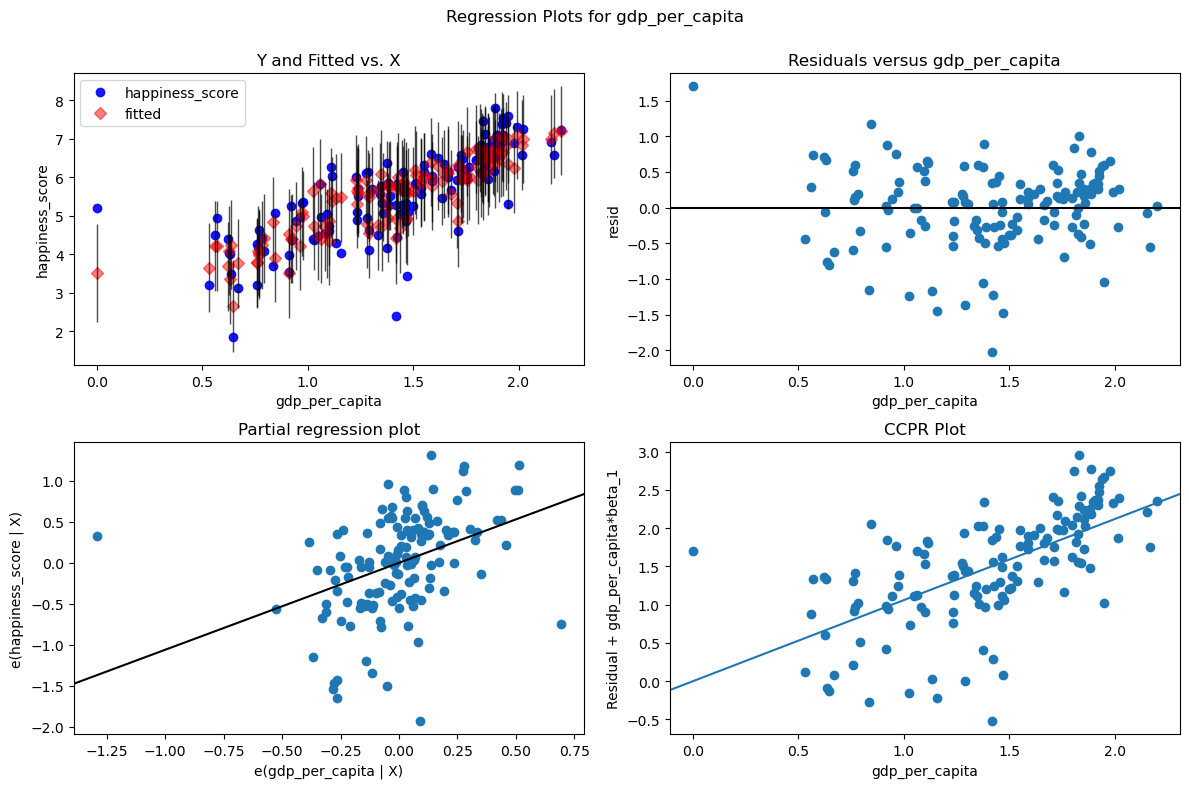

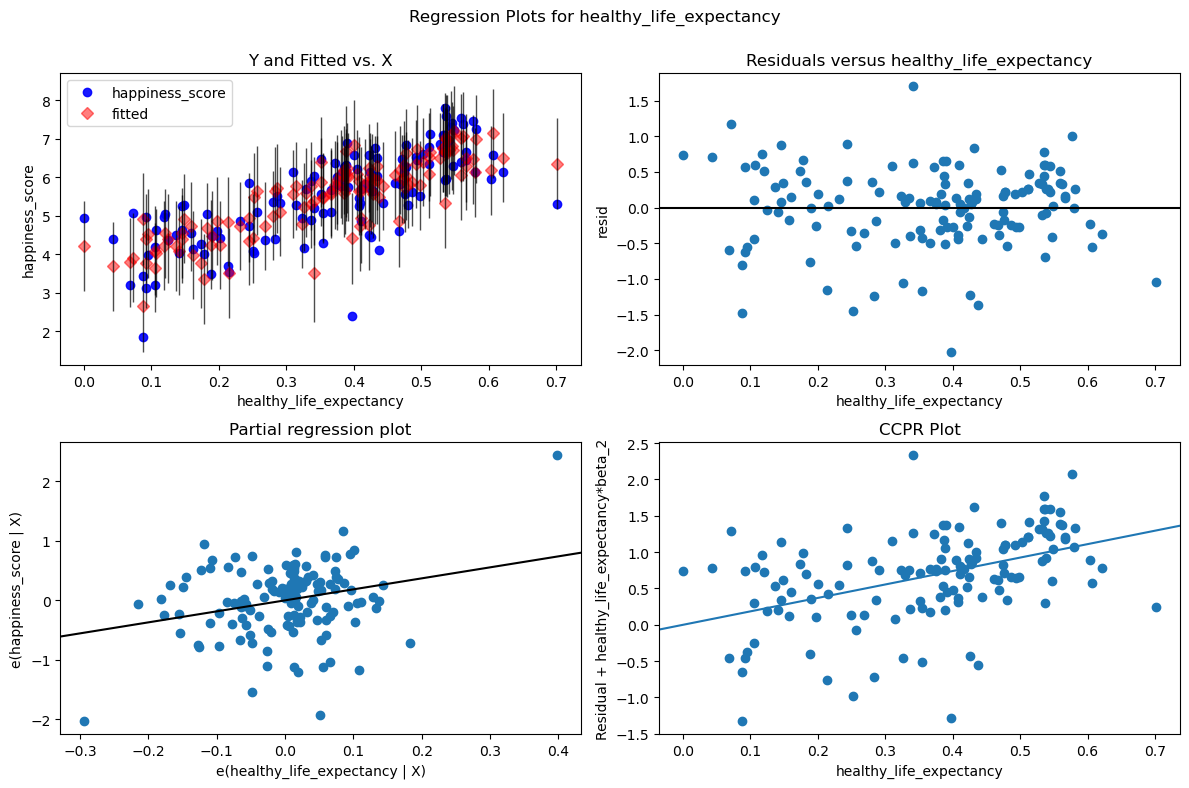

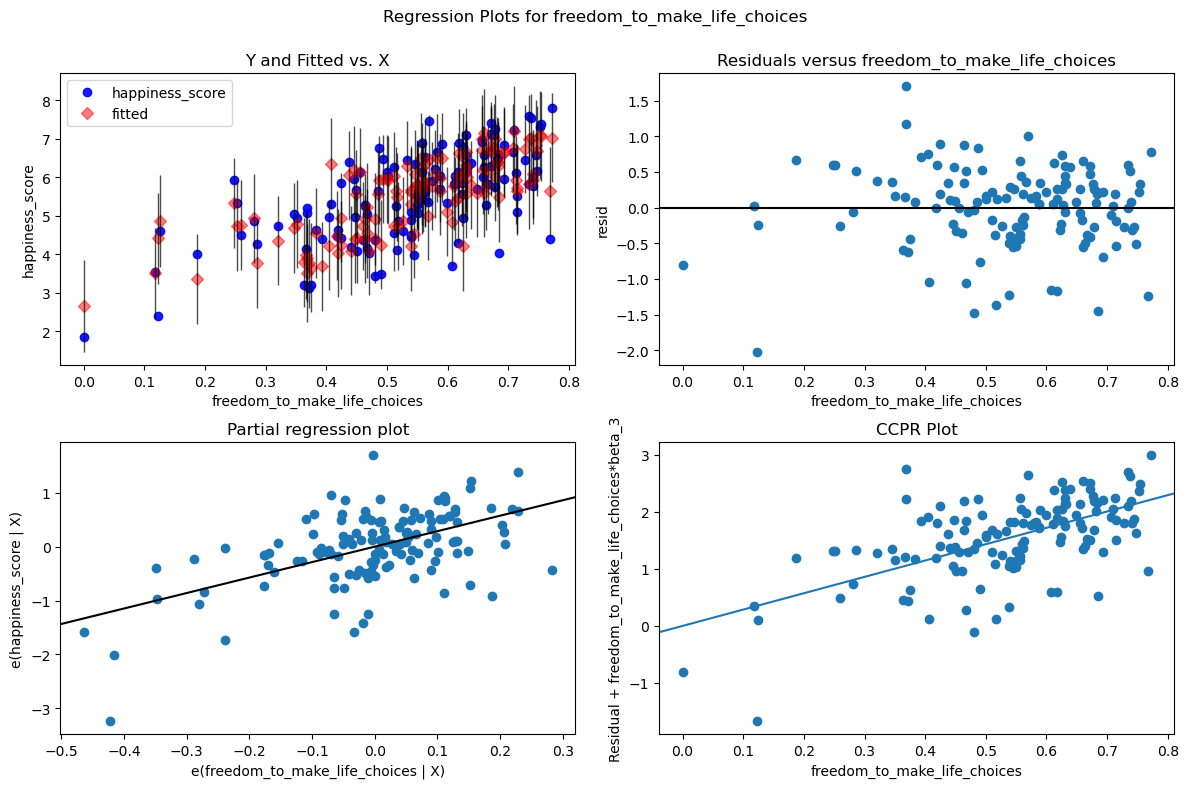

In [27]:
# Put your code here.
import statsmodels.api as sm

# Fitting the model using statsmodels
X_2023_sklearn = whr_2023_clean[['gdp_per_capita', 'healthy_life_expectancy', 'freedom_to_make_life_choices']]
y_2023_sklearn = whr_2023_clean['happiness_score']
X_2023_sklearn = sm.add_constant(X_2023_sklearn)  # Adding a constant term

model_sm_2023 = sm.OLS(y_2023_sklearn, X_2023_sklearn).fit()

# Creating plot_regress_exog figures for each significant feature in the reduced model
fig_gdp = plt.figure(figsize=(12, 8))
fig_gdp = sm.graphics.plot_regress_exog(model_sm_2023, 'gdp_per_capita', fig=fig_gdp)

fig_life_expectancy = plt.figure(figsize=(12, 8))
fig_life_expectancy = sm.graphics.plot_regress_exog(model_sm_2023, 'healthy_life_expectancy', fig=fig_life_expectancy)

fig_freedom = plt.figure(figsize=(12, 8))
fig_freedom = sm.graphics.plot_regress_exog(model_sm_2023, 'freedom_to_make_life_choices', fig=fig_freedom)


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

# Part 5: Logistic Regression (17 points)

In this part, we'd like to use logistic regression to classify whether a person has diabetes or not. Logistic regression (as we've learned so far in class) does binary classification. 



&#9989;  **Question 5.1 (2 points)**: We will work with data that is available at https://www.kaggle.com/datasets/aemyjutt/diabetesdataanslysis?select=diabetes.csv. 

**You'll need to download the following file**:

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/diabetes.csv`

**Do This**: In the cell below, type the code for downloading the data from inside your notebook and also code for loading the data into a pandas dataframe.

In [28]:
# Put your code here
!curl -O https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/diabetes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23873  100 23873    0     0  78407      0 --:--:-- --:--:-- --:--:-- 79312


&#9989;  **Question 5.2 (3 points)**:

Create a `Pandas` `Series` called `labels` which has data from the `Outcome` column of the DataFrame. Also, create a `Pandas` `DataFrame` called `features` which consists of just the columns `Glucose`, `BloodPressure`, `BMI`, and `Age`. Display the labels and features to make sure you did this correctly.

In [29]:
# Put your code here.
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Creating the Pandas Series for labels
labels = df['Outcome']

# Creating the Pandas DataFrame for features
features = df[['Glucose', 'BloodPressure', 'BMI', 'Age']]

labels.head(), features.head()


(0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64,
    Glucose  BloodPressure   BMI  Age
 0      148             72  33.6   50
 1       85             66  26.6   31
 2      183             64  23.3   32
 3       89             66  28.1   21
 4      137             40  43.1   33)

&#9989;  **Question 5.3 (4 points)**: Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [30]:
# Put your code here
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=0)

(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)


((614, 4), (154, 4), (614,), (154,))

&#9989;  **Question 5.4 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [31]:
# Put your code here
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

features_train_sm = sm.add_constant(features_train)

model_sm = sm.Logit(labels_train, features_train_sm).fit()

model_sm.summary()


Optimization terminated successfully.
         Current function value: 0.496121
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      609
Method:                           MLE   Df Model:                            4
Date:                Mon, 01 Apr 2024   Pseudo R-squ.:                  0.2407
Time:                        20:13:49   Log-Likelihood:                -304.62
converged:                       True   LL-Null:                       -401.18
Covariance Type:            nonrobust   LLR p-value:                 1.135e-40
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.8207      0.749    -10.440      0.000      -9.289      -6.352
Glucose           0.0315      0.004      8.404      0.000       0.024       0.039
BloodPressure    -0.0123      0.006     -2.202      0.028      -0.023      -0.001
BMI               0.0905      0.015      5.859      0.000       0.060       0.121
Age               0.0348      0.009      4.010      0.000       0.018       0.052
=================================================================================
"""

&#9989;  **Question 5.5 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [ ]:
# Put your code here

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [32]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/Z8B1R2tasz" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University